<a href="https://colab.research.google.com/github/AryanPhanse/ml_projects/blob/main/6_Loan_statud_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm


In [3]:
from sklearn.metrics import accuracy_score

Data collection and processing

In [4]:
#loading data to pandas df
loan = pd.read_csv('loan_data.csv')

In [5]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
loan.shape

(381, 13)

In [7]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [8]:
#number of missing values
loan.isnull().sum()

,0
Loan_ID,0
Gender,5
Married,0
Dependents,8
Education,0
Self_Employed,21
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,11


In [9]:
#we drop the missing values
loan = loan.dropna()

In [10]:
loan.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


**Label Encoding**

In [11]:
#converts the text data like yes and no to numericals like 0 and 1
loan.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [12]:
#no is 0 and yes is 1
#dependents column values
loan['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
3+,24


In [13]:
#replace all the 3+ values as 4
loan = loan.replace(to_replace='3+', value=4)

In [14]:
loan['Dependents'].value_counts()

,count
Dependents,
0,194
2,47
1,43
4,24


**Data Visualization**

<Axes: xlabel='Education', ylabel='count'>

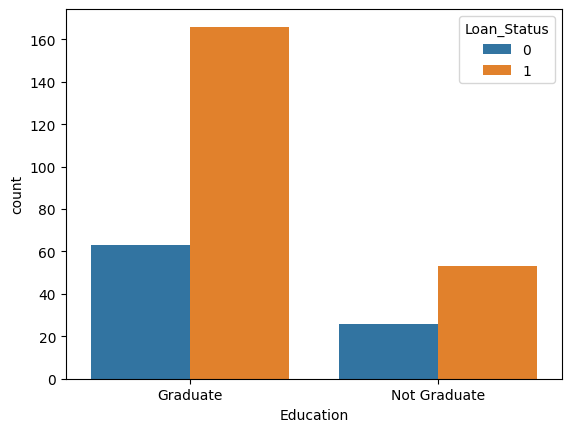

In [16]:
#relation between education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan) #1 is for loan accepted

<Axes: xlabel='Married', ylabel='count'>

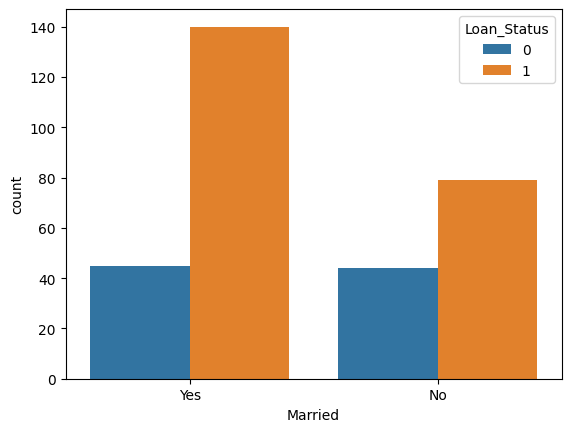

In [17]:
#relation between marital status and loan
sns.countplot(x='Married',hue='Loan_Status',data=loan)

In [22]:
#convert categorical columns to numerical values
loan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [23]:
loan.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [24]:
#seperating data and label
x=loan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=loan['Loan_Status']

In [25]:
print(x)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          1          1              0             4583   
1         1        1          0          1              1             3000   
2         1        1          0          0              0             2583   
3         1        0          0          1              0             6000   
4         1        1          0          0              0             2333   
..      ...      ...        ...        ...            ...              ...   
376       1        1          4          1              0             5703   
377       1        1          0          1              0             3232   
378       0        0          0          1              0             2900   
379       1        1          4          1              0             4106   
380       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [26]:
print(y)

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 308, dtype: int64


train test split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(308, 11) (277, 11) (31, 11)


Training the SVM model

In [30]:
classifier=svm.SVC(kernel='linear')

In [31]:
#training the svm model
classifier.fit(x_train,y_train)

SVC(kernel='linear')

Model evaluation

In [32]:
#accuracy of training data
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [33]:
print(training_data_accuracy)

0.8267148014440433


In [34]:
#accuracy of test data
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print(test_data_accuracy)

0.8064516129032258


Making a predictive system

In [35]:
input_data = (1,1,2,1,0,4000,0,161,360,1,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction=classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The loan is not approved')
else:
  print('The loan is approved')

[1]
The loan is approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
